# Analyzing U.S. Automobile fuel efficiency over time for single fuel Gasoline cars
----------------------


## Step 1: Business understanding

### Step 1.1 Problem Defination

This project is aimed at analyzing U.S. automobile fuel efficiency over time for single fuel gasoline cars. Currently, the majority of motor vehicles worldwide are powered by gasoline or diesel. Other energy sources include ethanol, biodiesel, propane, compressed natural gas (CNG), electric batteries charged from an external source, and hydrogen. However, it is important to know how the automobile fuel efficiency has changed over time.

### Step 1.2 Goals for the Business

The goal here will be to analyze U.S. automobile fuel efficiency over time for single fuel gasoline cars and provide answers to some few business questions. The majority of the questions will be answered through simple data exploration/visualization. In the modeling part, we would predict a car owner's save/spend over 5 years compared to an average car($). The main questions to be answered are;

- How does the size of a car engine affect it's fuel consumption?
- Over the years, what is the most popular engine type in the market? 
- Which car brand or  model is more economical?
- predicting whether a car owner will spend or save, depending on all the characteristics associated to the vehicle


## Step 2: Data understanding
### Step 2.1 : Data acquisition
In this project, we will be working with a dataset that contains fuel efficiency performance metrics, measured in **miles per gallon (MPG)** over time. The data is courtesy of the U.S. Department of Energy and the US Evironmental Protection Agency. The dataset also contains several features and attributes of the automobiles listed, thereby providing the opportunity to summarize and group data to determine which groups tend to have better fuel efficiency historically and how this has changed over the years.

The dataset was downloaded from http://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip and information about the variables in the dataset can be found at http://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

### Step 2.2: Get resources
Here, we will import and load all neccessary modules and libraries and files that will be used throughout this project.

In [1]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import display
from functools import reduce
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings; warnings.simplefilter('ignore')# suppress all warning messages

# Using magic command to tell IPython Notebook to render matplotlib
# graphs in the notebook
%matplotlib inline

/home/tony/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/tony/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/tony/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load the data 
vehicles = pd.read_csv("Data/vehicles.csv")

### Step 2.3: Explore data
In this section, I take a deep look at my dataset to try and understand it content.

In [3]:
# Let's have a look at our data
display(vehicles.head())
display(vehicles.index)
display(vehicles.columns)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


RangeIndex(start=0, stop=40230, step=1)

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40230 entries, 0 to 40229
Data columns (total 83 columns):
barrels08          40230 non-null float64
barrelsA08         40230 non-null float64
charge120          40230 non-null float64
charge240          40230 non-null float64
city08             40230 non-null int64
city08U            40230 non-null float64
cityA08            40230 non-null int64
cityA08U           40230 non-null float64
cityCD             40230 non-null float64
cityE              40230 non-null float64
cityUF             40230 non-null float64
co2                40230 non-null int64
co2A               40230 non-null int64
co2TailpipeAGpm    40230 non-null float64
co2TailpipeGpm     40230 non-null float64
comb08             40230 non-null int64
comb08U            40230 non-null float64
combA08            40230 non-null int64
combA08U           40230 non-null float64
combE              40230 non-null float64
combinedCD         40230 non-null float64
combinedUF         40

In [5]:
# Check columns which have mixed types.
# From the warning we get when loading the data, we see that columns with mixed types are at index [73,74,76]
column_names = vehicles.columns.values
column_names[[73,74,76]]

array(['mfrCode', 'c240Dscr', 'c240bDscr'], dtype=object)

In [6]:
# How many observations(rows) and variables(columns) are in the dataset
print("Number of rows is: {0}".format(len(vehicles)))
print("Number of columns is {0}".format(len(vehicles.columns)))

Number of rows is: 40230
Number of columns is 83


In [7]:
# Check how many unique years of data are included in the data
len(pd.unique(vehicles.year))

36

In [8]:
# Check the first and last years in the data
print("First year is: {0}".format(min(vehicles.year)))
print("Last year is : {0}".format(max(vehicles.year)))

First year is: 1984
Last year is : 2019


In [9]:
# Check what types of fuel are used as the automobiles' primary fuel types
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     27381
Premium Gasoline     11364
Diesel                1155
Electricity            170
Midgrade Gasoline      100
Natural Gas             60
Name: fuelType1, dtype: int64

In [10]:
# Check number of cars with automatic and manual transmissions.
# A = Automatic
# M = Manual
vehicles_copy = vehicles.copy()
vehicles_copy['trany2'] = vehicles_copy.trany.str[0]
pd.value_counts(vehicles_copy.trany2)

A    27487
M    12732
Name: trany2, dtype: int64

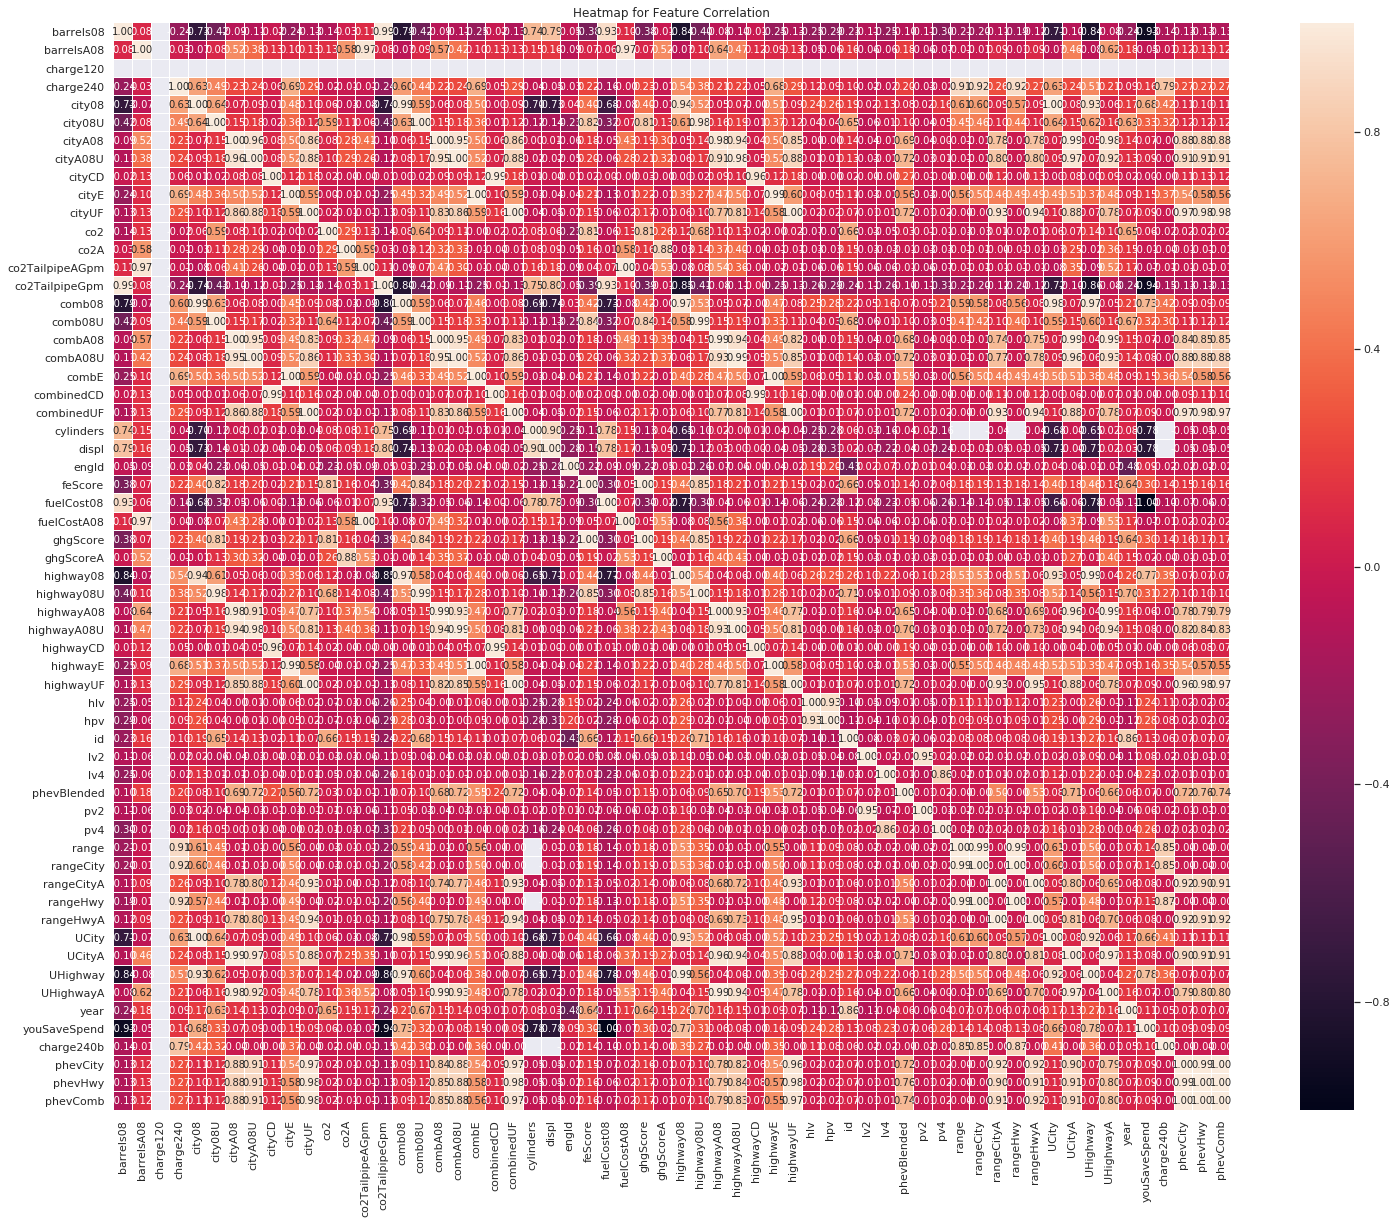

In [11]:
def features_corr(df):
    """
    Plot the correlation between features in a DataFrame
    
    Parameter
    ---------
    df : DataFrame
        data set to explore
    
    Return
    ------
    A heatmap showing the correlation between features
    """   
    plt.clf()
    fig, ax = plt.subplots(figsize=(25,20)) 
    corr = df.corr()
    sns.heatmap(corr, annot=True, ax=ax, linewidth=.01, fmt='.2f')
    #sns.set(font_scale=2)
    plt.title("Heatmap for Feature Correlation")
    plt.show()

# Check correlation between features
features_corr(vehicles)

#### 2.4 Discussion:
- From the analysis above, we can see the number of rows and columns in the dataset. We also see that the dataset has data which was gathered for a period of **36** years starting from **1984** to **2019**.
- We also see that **Regular Gasoline** is the most used primary fuel type followed by **Premuim Gasoline** and **Natural Gas** is the least used.
- We also see that the number of cars with automatic transmissions double that of manual transmissions.
- Also, we see that there 3 features with mixed types, so needs to be handled with care.

## Step 3: Data preparation 
### Step 3.1: Cleaning data
In this step, I will handle missing values, outliers and mixed types in the dataset.

**NB:** *Here, we will be dealing with single fuel gasoline cars and all our business questions will be base on them.*

In [12]:
# Create a copy of the data to be used in this step
vehicles_cleaning = vehicles.copy()

In [13]:
# Screen out the hybrid automobile makes. 

# select rows of the data frame where fueltype1 is "Regular Gasoline","Premium Gasoline","Midgrade Gasoline"
criteria1 = vehicles_cleaning.fuelType1.isin(["Regular Gasoline","Premium Gasoline","Midgrade Gasoline"])
# make sure that rows contain a null for fueltype2
criteria2 = vehicles_cleaning.fuelType2.isnull()
# ensures that the atvtype is not hybrid
criteria3 = vehicles_cleaning.atvType != "Hybrid"

vehicles_cleaning = vehicles_cleaning[criteria1 & criteria2 & criteria3]
vehicles_cleaning.shape

(36750, 83)

In [14]:
vehicles_cleaning.columns.values
#df = df.drop(df[<some boolean condition>].index)

array(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF',
       'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08',
       'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD',
       'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr',
       'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1',
       'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08',
       'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv',
       'id', 'lv2', 'lv4', 'make', 'model', 'mpgData', 'phevBlended',
       'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway', 'UHighwayA',
       'VClass', 'year', 'youSaveSpend', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn',
       'mod

There are some features which are mainly for dual fuel car types, and also some features which are useless for our analysis and prediction. By investigating each feature description [here](https://www.fueleconomy.gov/feg/ws/index.shtml#ympgVehicle), I was able to pick out the follwoing feautes which I think are irelevant and we are going to drop them here

```
barrelsA08
eng_dscr
engId
createdOn
modifiedOn
startStop
trans_dscr
rangeA
c240Dscr
c240bDscr
rangeHwyA
UCityA
UHighwayA
highwayA08U
rangeCityA
highwayA08
cityA08
cityA08U
co2A
co2TailpipeAGpm
fuelType
combA08
fuelCostA08
ghgScoreA
```

In [15]:
drop_f = ['barrelsA08', 'eng_dscr', 'engId', 'createdOn', 'modifiedOn',
          'startStop', 'trans_dscr', 'rangeA', 'c240Dscr', 'c240bDscr', 'rangeHwyA', 'UCityA', 'UHighwayA', 
          'highwayA08U', 'rangeCityA', 'highwayA08', 'cityA08', 'cityA08U', 'co2A',
          'co2TailpipeAGpm', 'fuelType', 'combA08','combA08U', 'fuelCostA08', 'ghgScoreA','id']

# Remove the irelevant columns from the dataset
vehicles_cleaning.drop(drop_f, axis=1, inplace=True)

In [16]:
vehicles_cleaning.shape

(36750, 57)

#### Step 3.1.1 Access columns with missing data
In the dataset, missing data is represented with a **nan**. I will investigate for each rows, how many missing data are present.

Before we check for missing data, we have certain features which need special attention. Some features doesn't represent their missing values as `NaNs`. We have features like:
- **feScore** - EPA Fuel Economy Score (-1 = Not available)

These features uses (-1) as their missing values. We will need to convert every -1 to NaN

In [17]:
# Convert all -1 to NaN for feature(feScore)
features=['feScore']
for f in features:
    vehicles_cleaning[f].replace([-1], [np.nan], inplace=True)

Text(0,0.5,'# Missing values')

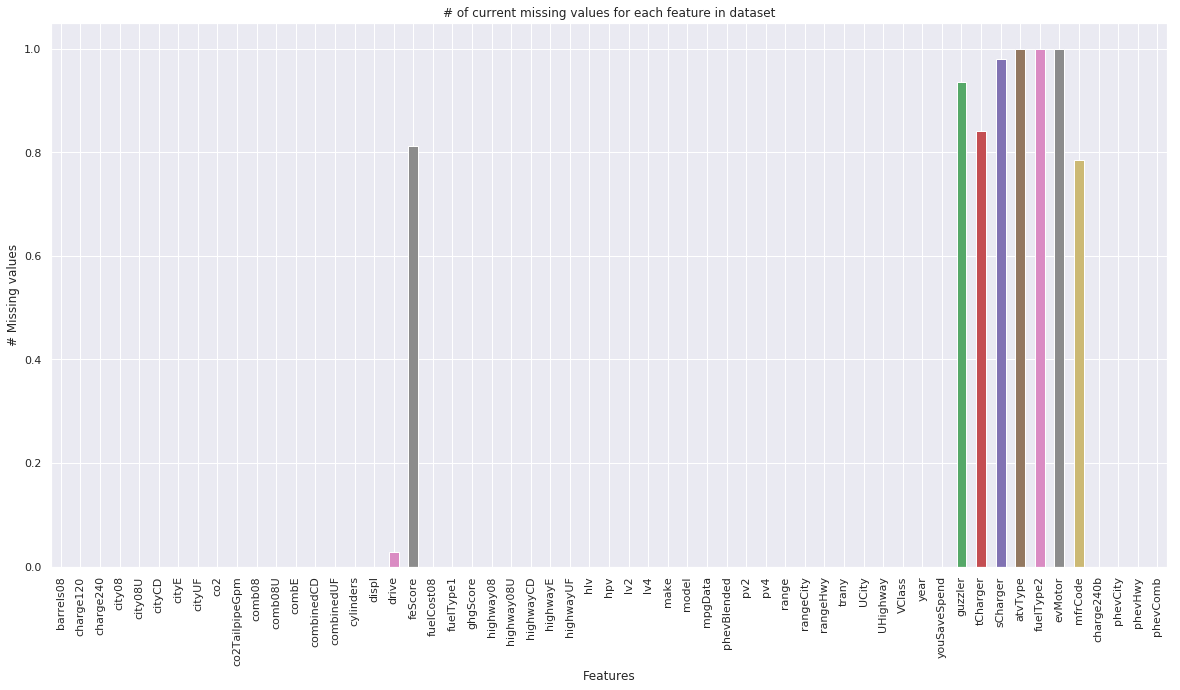

In [18]:
# Plot a bar chart of missing values in the dataframe
plt.clf()
a = vehicles_cleaning.isnull().sum()/len(vehicles_cleaning)
title = '# of current missing values for each feature in dataset'
a.plot(title=title,kind='bar', figsize=(20,10))
plt.xlabel('Features')
plt.ylabel('# Missing values')

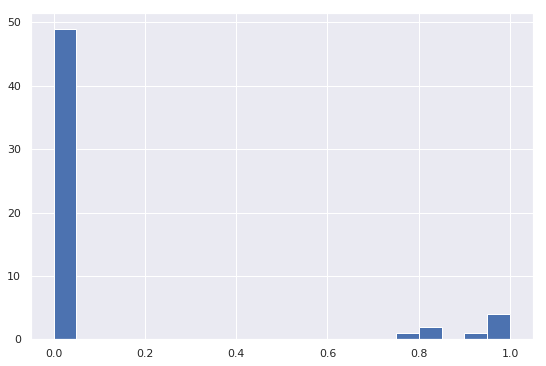

In [19]:
# Perform an assessment of how much missing data there is in each column of the dataset
def missing_value_in_each_column(data):
    """
    Print out how much missing data there is in each column of data
    
    Parameter
    ---------
    data : DataFrame
        data set to explore
    
    Return
    ------
    Print out amount of missing data in each column of the dataset
    """
    a = data.isnull().sum()/len(data)
    a.hist(figsize=(9,6),   # Plot size
           bins=20)         # Number of histogram bins
missing_value_in_each_column(vehicles_cleaning)

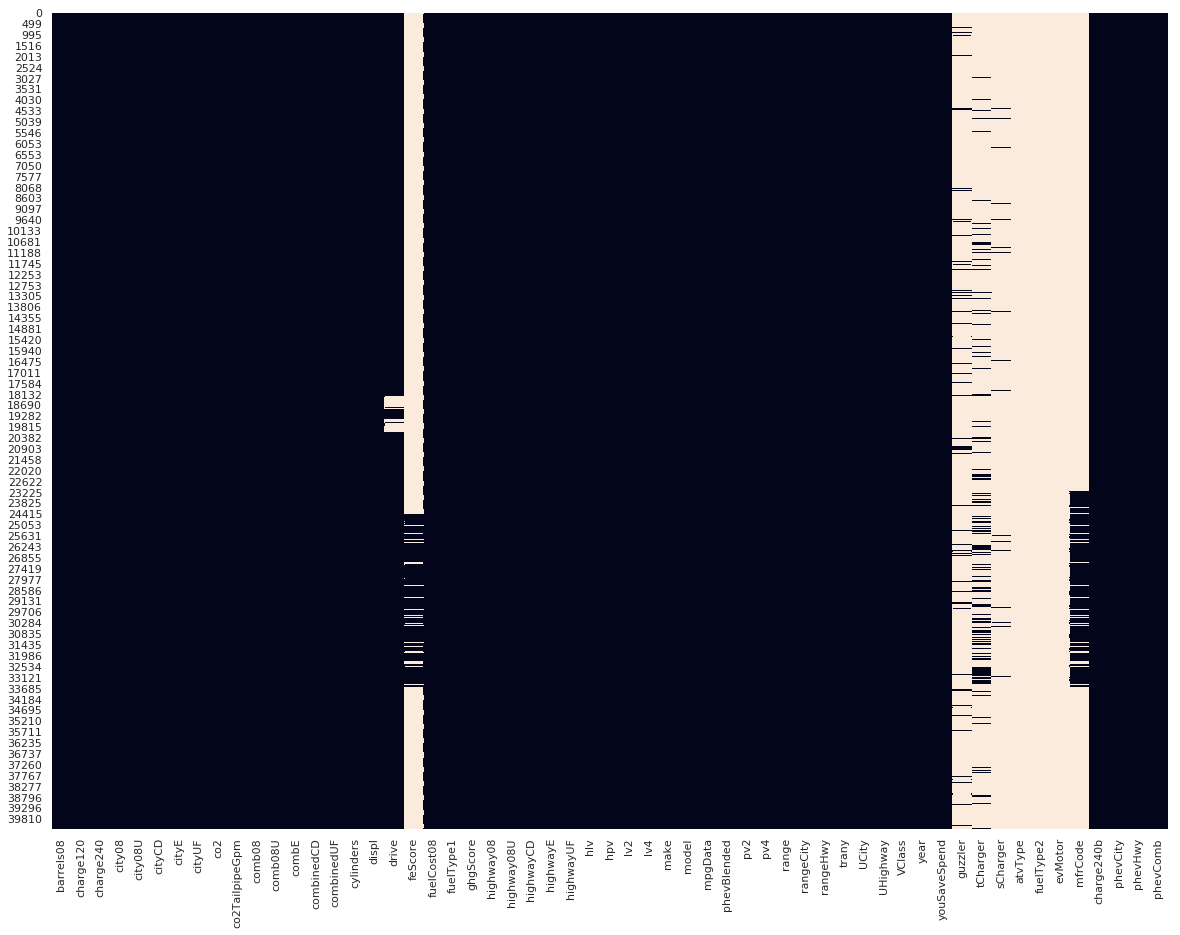

In [20]:
# Investigate patterns in the amount of missing data in each column.
plt.subplots(figsize=(20,15))
sns.heatmap(vehicles_cleaning.isnull(), cbar=False)

#### Step 3.1.2:  Handling Outliers
Outliers in data can be defined as *an observation that lies an abnormal distance from other values in a random sample from a population*. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.

In this data,we will first consider features with missing values more than 20% and investigate them. Also, we will investigate each features to see if they will help us in our analysis and prediction. 

In [21]:
# Identify outliers(features with missing values more 20%)
pct_null = vehicles_cleaning.isnull().sum() / len(vehicles_cleaning)
missing_features = pct_null[pct_null > 0.20].index 
# Print all the outliers columns to be removed.  
pd.DataFrame(missing_features, columns=("Outlier columns",))

,Outlier columns
0,feScore
1,guzzler
2,tCharger
3,sCharger
4,atvType
5,fuelType2
6,evMotor
7,mfrCode


In [22]:
# Remove the outlier columns from the dataset
vehicles_cleaning.drop(missing_features, axis=1, inplace=True)

In [23]:
vehicles_cleaning.head()

,barrels08,charge120,charge240,city08,city08U,cityCD,cityE,cityUF,co2,co2TailpipeGpm,...,trany,UCity,UHighway,VClass,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,19,0.0,0.0,0.0,0.0,-1,423.190476,...,Manual 5-spd,23.3333,35.0000,Two Seaters,1985,-2250,0.0,0,0,0
1,29.964545,0.0,0.0,9,0.0,0.0,0.0,0.0,-1,807.909091,...,Manual 5-spd,11.0000,19.0000,Two Seaters,1985,-11500,0.0,0,0,0
2,12.207778,0.0,0.0,23,0.0,0.0,0.0,0.0,-1,329.148148,...,Manual 5-spd,29.0000,47.0000,Subcompact Cars,1985,0,0.0,0,0,0
3,29.964545,0.0,0.0,10,0.0,0.0,0.0,0.0,-1,807.909091,...,Automatic 3-spd,12.2222,16.6667,Vans,1985,-11500,0.0,0,0,0
4,17.347895,0.0,0.0,17,0.0,0.0,0.0,0.0,-1,467.736842,...,Manual 5-spd,21.0000,32.0000,Compact Cars,1993,-5750,0.0,0,0,0


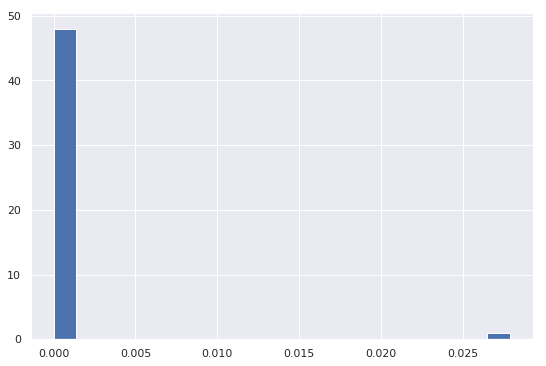

In [24]:
# Perform an assessment of how much missing data there is in each column of the
# dataset after removing the outlier columns
missing_value_in_each_column(vehicles_cleaning)

#### 3.1.3 Handling Missing Values
In the above **step 3.1.2**, we considered features with missing values above the thresthold of **20%** to be outliers and were removed from the dataset. Here, I will handle the remaining features with missing values below the thresthold.

In [25]:
# Display the percentage of missing values in each feature
def missing_values_per(df):
    """
    Print out percentage of missing values in data set
    
    Parameter
    ---------
    data : DataFrame
        data set to explore
    
    Return
    ------
    Print out of features with more than )% of missing values
    """
    missing_vals = []
    missing_values_proportion =(df.isnull().sum()/len(df))
    print("Percentage of Missing Values")
    if np.max(missing_values_proportion.values) > 0.:
        for x in range(len(missing_values_proportion)):
            if(missing_values_proportion[x] > 0):
                missing_vals = missing_values_proportion.index[x]
                print("{} has {:.1f}% of data marked as NaNs".format(missing_vals, (missing_values_proportion[x]*100)))
    else:
        print("No features with missing values")
            
missing_values_per(vehicles_cleaning)

Percentage of Missing Values
cylinders has 0.0% of data marked as NaNs
displ has 0.0% of data marked as NaNs
drive has 2.8% of data marked as NaNs
trany has 0.0% of data marked as NaNs


In [26]:
# 'trany','cylinder','displ' are marked as 0.0% for NaNs, 
# yet it is detected with missing values, lets check it clearly.
print('Cylinders:',vehicles_cleaning.cylinders.isnull().sum())
print('displ:',vehicles_cleaning.displ.isnull().sum())
print('trany:',vehicles_cleaning.trany.isnull().sum())

Cylinders: 3
displ: 2
trany: 2


In [27]:
# Check non-numeric/categorical columns
vehicles_cleaning.dtypes[vehicles_cleaning.dtypes != 'int64'][vehicles_cleaning.dtypes != 'float64']

drive          object
fuelType1      object
make           object
model          object
mpgData        object
phevBlended      bool
trany          object
VClass         object
dtype: object

In [28]:
# Check data type for each features with missing values.
features = ['cylinders','displ','drive','trany']
for f in features:
    print("{0}: {1}".format(f, vehicles_cleaning[f].dtype))

cylinders: float64
displ: float64
drive: object
trany: object


##### 3.1.4 Handling numerical/Categorical  data 
From the percentage of missing values above, we see that the percentage is really low and it won't be reasonable for us to delete them as we may be loosing some potential information from them. So, we will impute all the missing values with valid values.

In [29]:
# Impute numerical data 
num_feat = ['cylinders','displ']

for feat in num_feat:
    vehicles_cleaning[feat] = vehicles_cleaning[feat].fillna(vehicles_cleaning[feat].median())

In [30]:
# Impute categorical data
cat_feat = ['drive', 'trany']
for feat in cat_feat:
    vehicles_cleaning[feat] = vehicles_cleaning[feat].fillna(vehicles_cleaning[feat].mode()[0])

In [31]:
# Checking whether imputaions were successful
missing_values_per(vehicles_cleaning)

Percentage of Missing Values
No features with missing values


In [32]:
display(vehicles_cleaning.shape)
display(vehicles_cleaning.info())

(36750, 49)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36750 entries, 0 to 40229
Data columns (total 49 columns):
barrels08         36750 non-null float64
charge120         36750 non-null float64
charge240         36750 non-null float64
city08            36750 non-null int64
city08U           36750 non-null float64
cityCD            36750 non-null float64
cityE             36750 non-null float64
cityUF            36750 non-null float64
co2               36750 non-null int64
co2TailpipeGpm    36750 non-null float64
comb08            36750 non-null int64
comb08U           36750 non-null float64
combE             36750 non-null float64
combinedCD        36750 non-null float64
combinedUF        36750 non-null float64
cylinders         36750 non-null float64
displ             36750 non-null float64
drive             36750 non-null object
fuelCost08        36750 non-null int64
fuelType1         36750 non-null object
ghgScore          36750 non-null int64
highway08         36750 non-null int64
hig

None

## Step 4:  Data Visualization
To understand the automobile fuel efficiency over time for single fuel Gasoline cars, we will visualize/analyze the sample data over the 36 given years.

In [34]:
# Create a copy of the data
vehicles_non_hybrid = vehicles_cleaning.copy()

### Question 4.1 Over the years, what is the most popular engine size type in the market?
To answer this question, we will visualize two features:
- **displ**: This is the engine displacement in liters
- **year**: The 36 given years of this study

**NB:** *Here we are dealing with single fuel gasoline cars*

In [35]:
# Group the data by year for non hybrid cars
# Compute the mean of three columns ['displ']
# Create a new column named 'year' which contains the data frame's index.
group_year = vehicles_non_hybrid.groupby(['year'])
average_year = group_year['displ'].agg([np.mean])
average_year['year'] = average_year.index

In [36]:
def plot_graph(df, aes_x, aes_y, x_lab='', y_lab='', title='', color='steelblue', geom_type = 'line'):
    """
    Plot a graph showing the relationship between 2 features
    
    Parameter
    ---------
    df : DataFrame
        data set to explore
    aes_x: string
        the plot x-axis
    aes_y: string
        the plot y-axis
    x_lab: string
        the plot x-axis label
    y_lab: string
        the plot y-axis label
    title: string
        plot heading
    color: string
        determine the plot color
    geom_type: string
        determine the geometric type for the plot
    
    
    Return
    ------
    A plot showing the relationship between features
    """     
    if geom_type =='line':
        print(ggplot(df, aes(aes_x, aes_y)) +\
        geom_line(color=color) + xlab(x_lab) + ylab(y_lab) + ggtitle(title))
    elif geom_type == 'point':
        print(ggplot(df, aes(aes_x, aes_y)) +\
        geom_point(color=color) + xlab(x_lab) + ylab(y_lab) + ggtitle(title))        

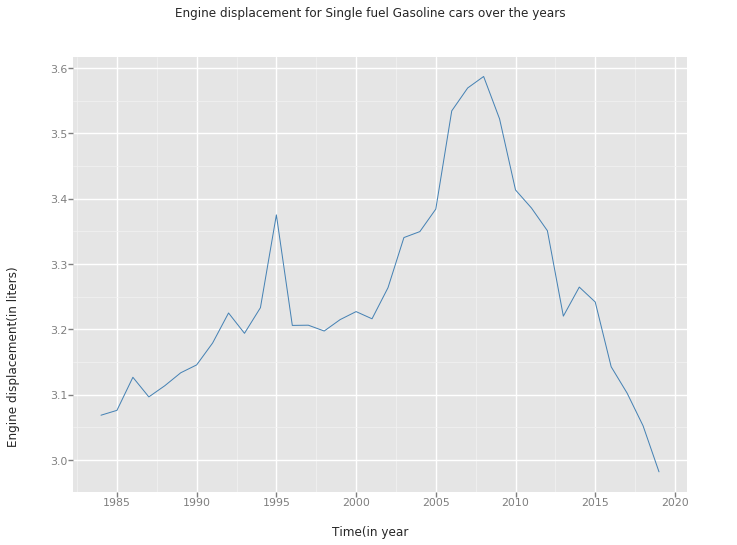

<ggplot: (-9223363253820241443)>


In [37]:
# Plot displacement against year
aes_x = 'year'
aes_y = 'mean'
x_lab = "Time(in year"
y_lab = "Engine displacement(in liters)"
title = "Engine displacement for Single fuel Gasoline cars over the years"
plot_graph(average_year, aes_x, aes_y, x_lab, y_lab, title)

#### Discussion 4.1.1
From the preceding figure, the average engine displacement has decreased
substantially since 2008. We can conclude that more small cars or cars with small engine type were made in later years from 2008. So my advice to investors will be to invest more on small cars or cars with small engine sizes for there are winning the market now.

### 4.2 How does the size of a car engine affect it's fuel consumption?
To answer this question, we will visualize two features:
- **displ**: This is the engine displacement in liters
- **comb08**: This is the combined MPG(Mile Per Gallon) for single fuel vehicles

In [38]:
# Verify the feature 'displ' which represents engine displacement.
pd.unique(vehicles_non_hybrid.displ)

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  6.6,  6.4,  0.9])

In [39]:
# Verify the feature 'comb08'.
pd.unique(vehicles_non_hybrid.comb08)

array([21, 11, 27, 19, 22, 25, 24, 26, 13, 23, 20, 16, 18, 17, 15, 10, 14,
       12, 28, 34, 30, 33, 41, 31, 40, 47, 38, 36, 32, 43, 29,  8, 35,  9,
       37, 46,  7, 48, 39, 42, 44])

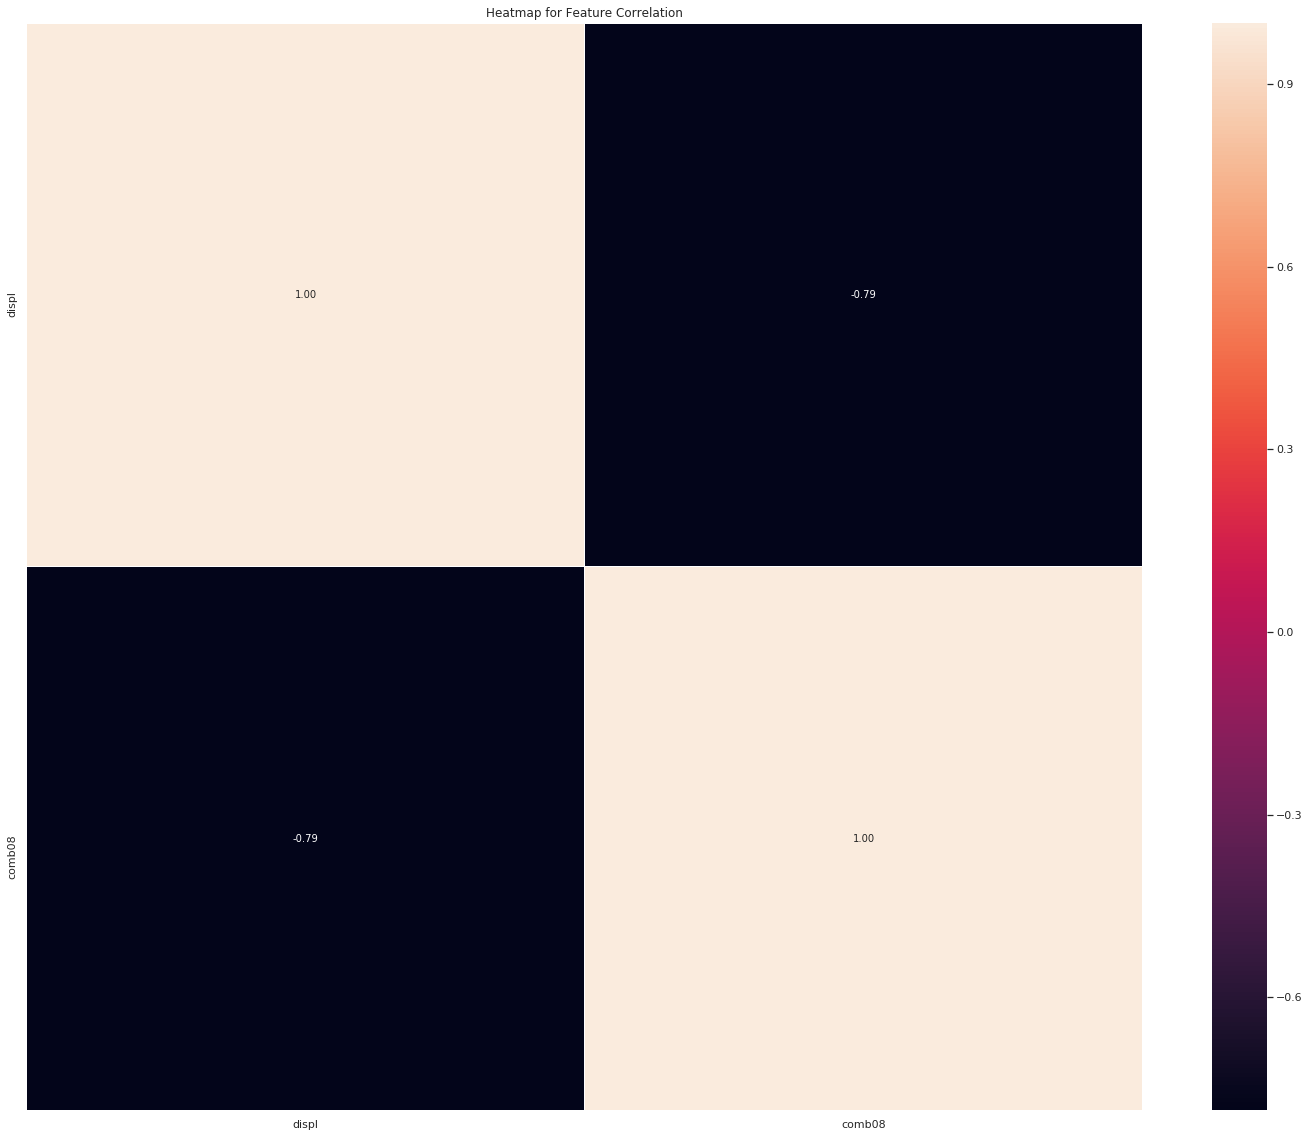

In [40]:
# Check corrrelation between displ and comb08 for single fuel vehicles
displ_comb = vehicles_non_hybrid[['displ','comb08']]
features_corr(displ_comb)

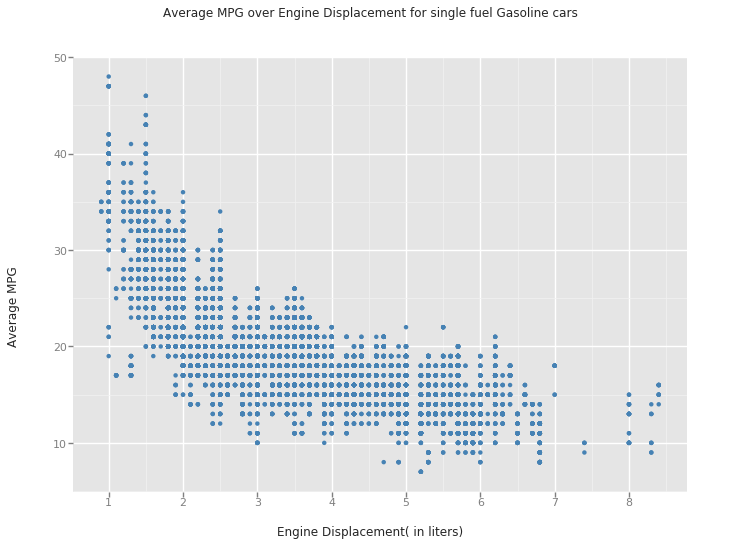

<ggplot: (8782992601713)>


In [41]:
# Plot Average MPG(Miles Per Gallon) against Engine Displacement
aes_x = 'displ'
aes_y = 'comb08'
x_lab = "Engine Displacement( in liters)"
y_lab = "Average MPG"
title = "Average MPG over Engine Displacement for single fuel Gasoline cars"
plot_graph(vehicles_non_hybrid, aes_x, aes_y, x_lab, y_lab, title, geom_type='point')

#### Discussion 4.2.1
From the preceding figures, the heatmap and the scatter plot offer the convincing evidence that there is a negative, or even inverse correlation, between engine displacement and fuel efficiency; thus,
cars with small engine sizes tend to be more fuel-efficient because there seem to consume lesser than cars with large engine sizes. So my advice to anyone who wishes to buy a car and willing to spend less on fuel, will be to go for cars with small engine sizes.

### Question 4.3 Which car brand or  model is more economical?
To answer this question, we will visualize two features:
- **make**: manufacturer or brand name
- **comb08**: This is the combined MPG(Mile Per Gallon) for single fuel vehicles

We are going to examine the manufacturers or brand of the various automobiles more carefuly. We will focus on 4-cylinder cars.

In [42]:
# Check the frequency of makes(manufacturers) and models of cars available
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.])

In [43]:
# Choose 4-cylinder cars for futher visualization
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

AxesSubplot(0.125,0.125;0.775x0.755)


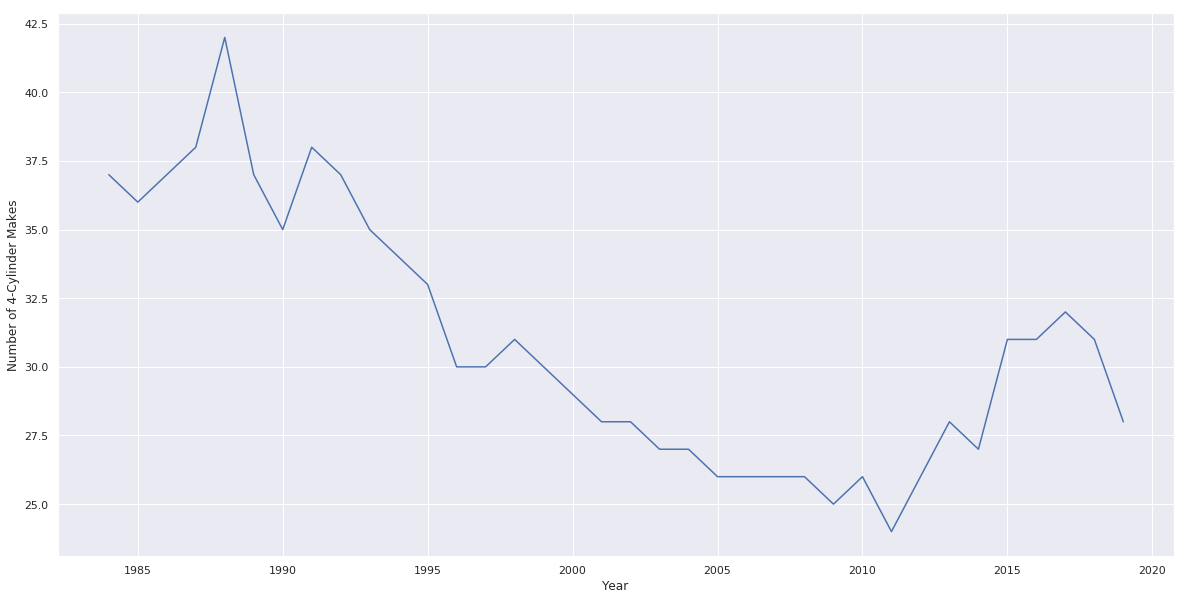

In [44]:
# Plot numbers of makes that have 4-cylinder cars over the years
grouped_by_year_4Cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()

plt.figure(figsize=(20,10))
fig = grouped_by_year_4Cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print(fig)

#### Note 
From the preceding figures, we see a decline in the number of makes with 4-cylinder engines available since 1980. However, as a caveat, this plot could be misleading, as we do not know if the total number of available makes per
year has changed over the same period of time.

So below, we will look at automobile makes with 4-cylinder engines that were present in every year of this study.

In [45]:
# Check automobile makes with 4-cylinder engines that were present in every year
grouped_by_year_4Cylinder = vehicles_non_hybrid_4.groupby(['year'])

unique_makes = []
# Get all makes in each years
for name, group in grouped_by_year_4Cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
# Intersect to get makes that are present in every year    
unique_makes = reduce(set.intersection, unique_makes)
print(unique_makes)


{'Toyota', 'Mazda', 'Chevrolet', 'Honda', 'Ford', 'Jeep', 'Subaru', 'Nissan', 'Mitsubishi', 'Volkswagen'}


In [46]:
# Subset the data frame to contain only rows with a make within the set of unique makes
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)
common_makes = vehicles_non_hybrid_4[boolean_mask]
# Group the data frame by both year and make, then compute the mean for 
# each grouping
common_makes_grouped = common_makes.groupby(['year','make']).agg(np.mean).reset_index()

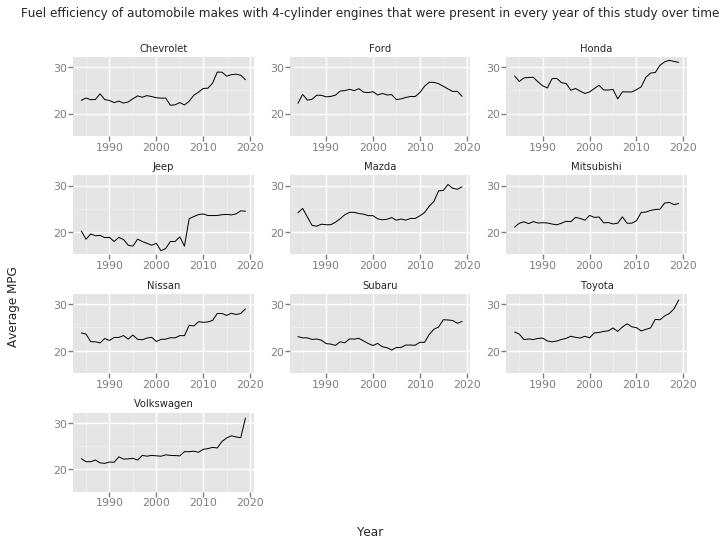

<ggplot: (8782992590877)>

In [47]:
title = "Fuel efficiency of automobile makes with 4-cylinder engines that were present in every year of this study over time"
ggplot(aes(x='year', y='comb08'), data = common_makes_grouped) + geom_line() \
 + xlab("Year") + ylab("Average MPG") + ggtitle(title) + facet_wrap('make')


#### Discussion 4.3.1
From the preceding figure, we see that most manufacturers(makes) have shown improvement over time, though several manufactueres have demonstrated quite sharp fuel efficiency increases in the last 5 years.
- **Honda**, **Mazda**, **Volkswagen**  and **Toyota** have shown a massive improvement in fuel efficiency and there are the most efficient in the list.
- **Jeep** and **Ford** shows a really poor fuel efficiency.

So my advice to anyone who is looking for a more economical brand or model with 4-cylinder should go for **Honda**,**Toyota**.**Mazda** and also **Volkswagen**

### Question 5: Predicting whether a car owner will spend or save, depending on some characteristics associated to the vehicle

### 5.1 Build model 
To carry out our prediction, we will look at three different machine learning models and see how there perform. The models we will be looking at are:
- Logistic Regression Model
- Support Vector Classifier
- Stochastic Gradient Decent Classifier

Then we will use the following evaluation technique to optimize the model performance.

- Grid Search CV

- Cross Validation Score

For our target feature, we will use **youSaveSpend** 
>**youSaveSpend** - you save/spend over 5 years compared to an average car ($). Savings are positive; a greater amount spent yields a negative number. For dual fuel vehicles, this is the cost savings for gasoline

**NB**: We will focus our prediction on the manufacturer of **Toyota**. Also, we couldn't use all our data since it is large, and it took us a lot of time to train with the various machine learning models.

In [290]:
# Select only toyota
toyota_df =  vehicles_non_hybrid.loc[vehicles_non_hybrid['make'] == 'Toyota']

In [149]:
toyota_df.make.value_counts()

Toyota    1879
Name: make, dtype: int64

In [150]:
# Analyse 'youSaveSpend`
toyota_df['youSaveSpend'].value_counts()

-4000     167
-2250     159
-3500     154
-2000     152
-6500     147
-5500     112
-1000     110
-4750     103
-2750      98
-750       93
-500       88
-1500      88
 1000      63
 0         53
 500       51
-7500      49
 250       35
 750       25
-5750      24
-8500      20
 1250      20
 1500      11
-11500     10
-10000     10
-2500       9
-3000       7
-13500      6
-5000       5
 1750       4
-1750       3
-8250       3
Name: youSaveSpend, dtype: int64

#### 5.1.2   analysis relationship between target feature and other features

We will first try to visualize the relationship between the target variable and some of the other features(numerical features) to get an intuition of how there can determine whether you will spend or save for a verhicle.

To explore the data, we would visualise the variations of the target variable with respect to the some of the other features of the the data set to get an intuition of how they affect the pricing of houses.


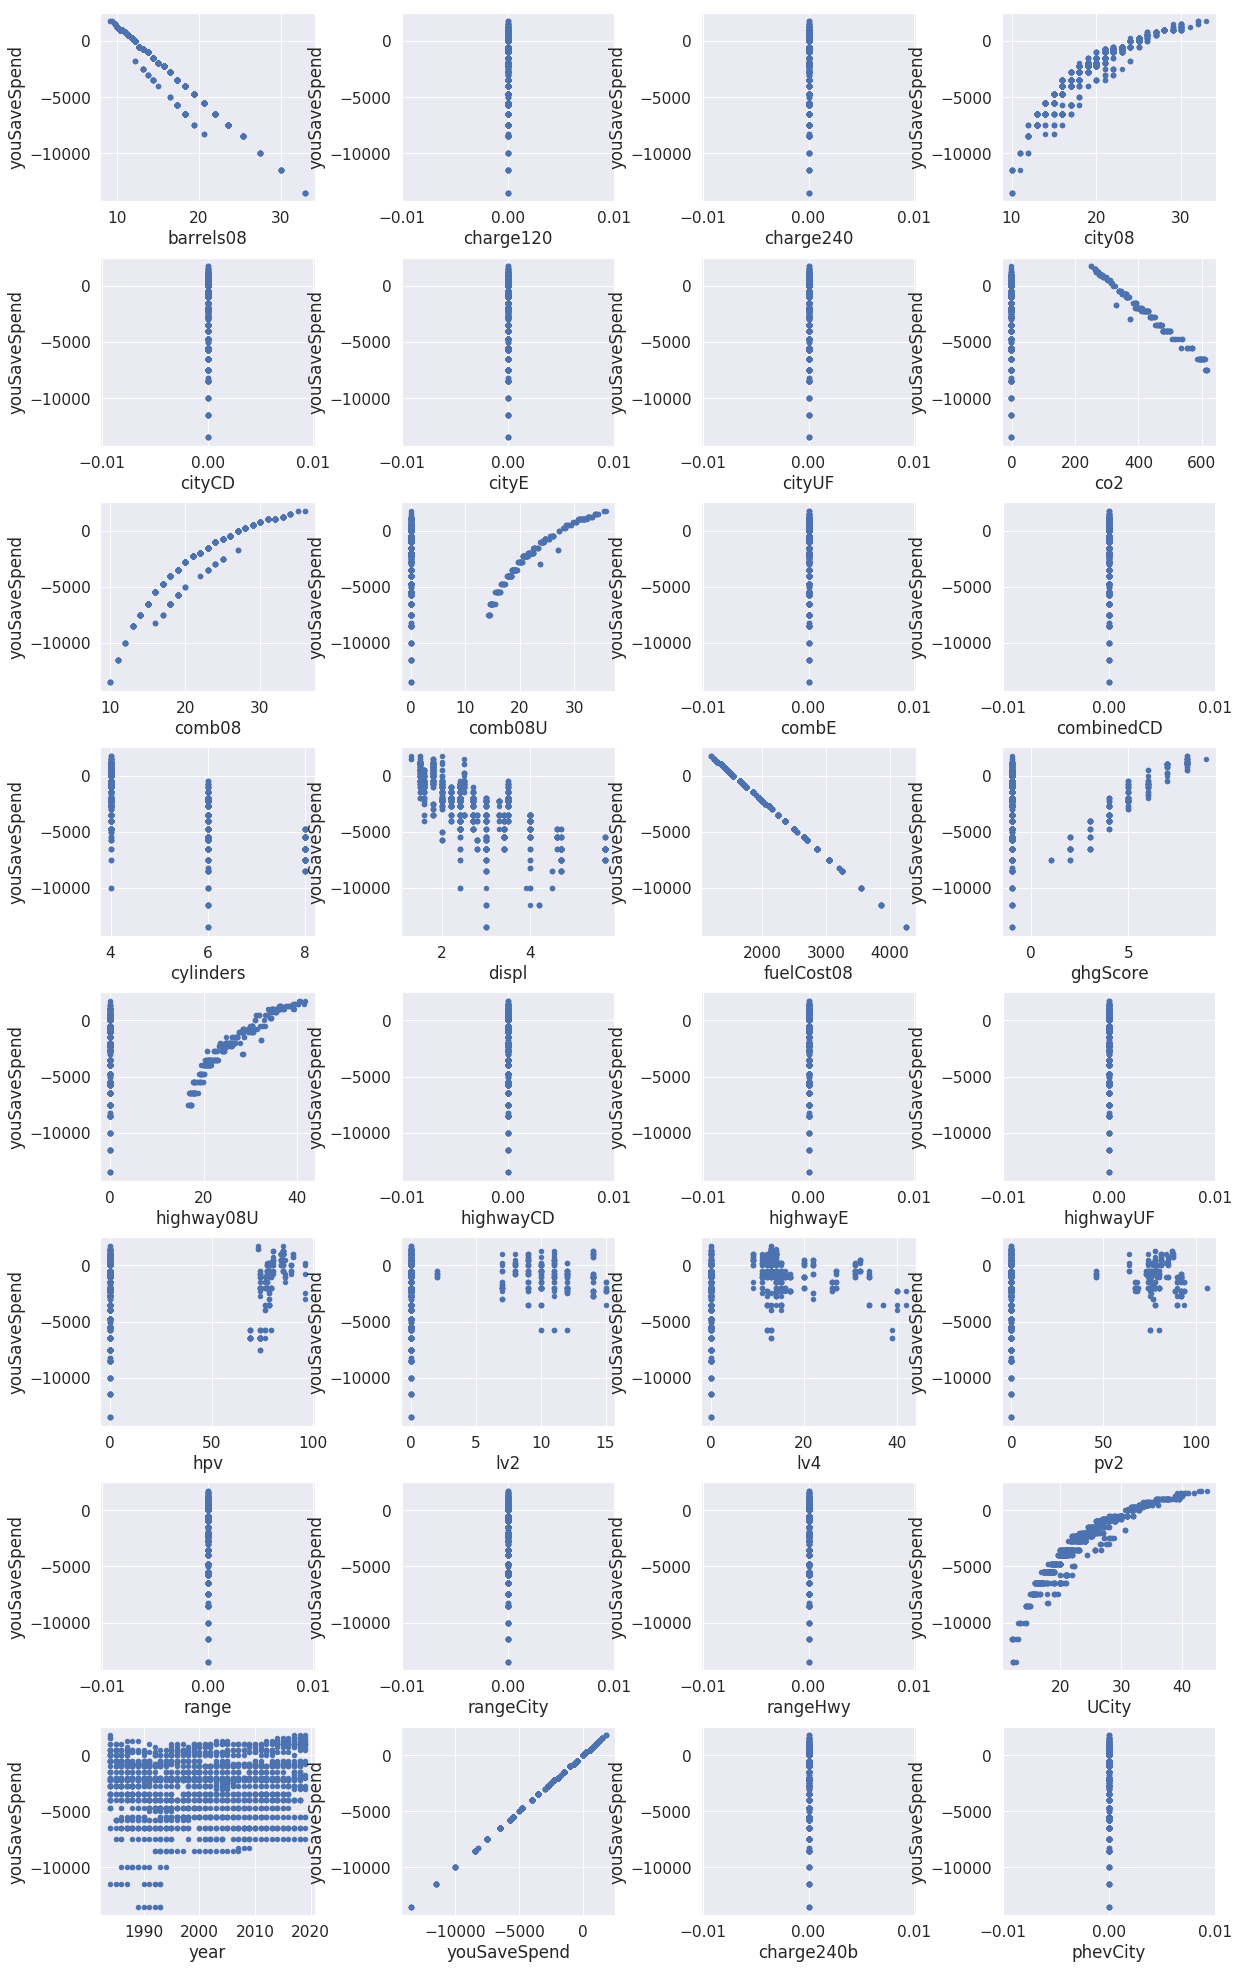

In [151]:
# Analysis numerical features with youSaveSpend
numeric_data = toyota_df.select_dtypes(include=['int64','float64'])
fig, ax = plt.subplots(8,4, figsize=(20,35))
j,k = 0,0
for i, feat in enumerate(numeric_data.columns):
    if j < 8:
        if k < 4:
            numeric_data.plot(x=feat, y='youSaveSpend', kind='scatter',  ax=ax[j][k], legend=False)
            k=k+1
        else:
            k=0
            j=j+1
plt.subplots_adjust(hspace=0.30, wspace=0.40)
plt.show()

#### 5.1.1  Convert targe feature to binary categorical
The target feature tells us two main things, either you 'Save' or you 'Spend'. We will make it binary with the numeric values (1,0) where:
- 1 = Save
- 0 = Spend

**NB** youSaveSpend has `0` as its value. however, here I considered `0` as saving

In [152]:
# Convert 'youSaveSpend' to binary categorical 
toyota_df["youSaveSpend"] = \
    [1 if i >=0 else 0 for i in toyota_df["youSaveSpend"]]

In [153]:
# Analyse 'youSaveSpend`
toyota_df['youSaveSpend'].value_counts()

0    1617
1     262
Name: youSaveSpend, dtype: int64

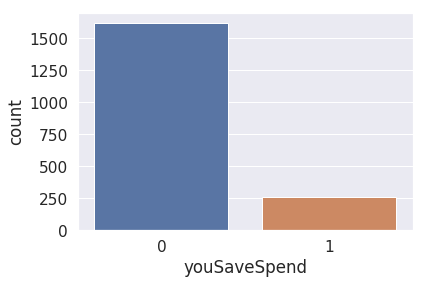

In [154]:
# Generate a countplot to see how the 0s and 1s varies
sns.countplot(toyota_df['youSaveSpend'])

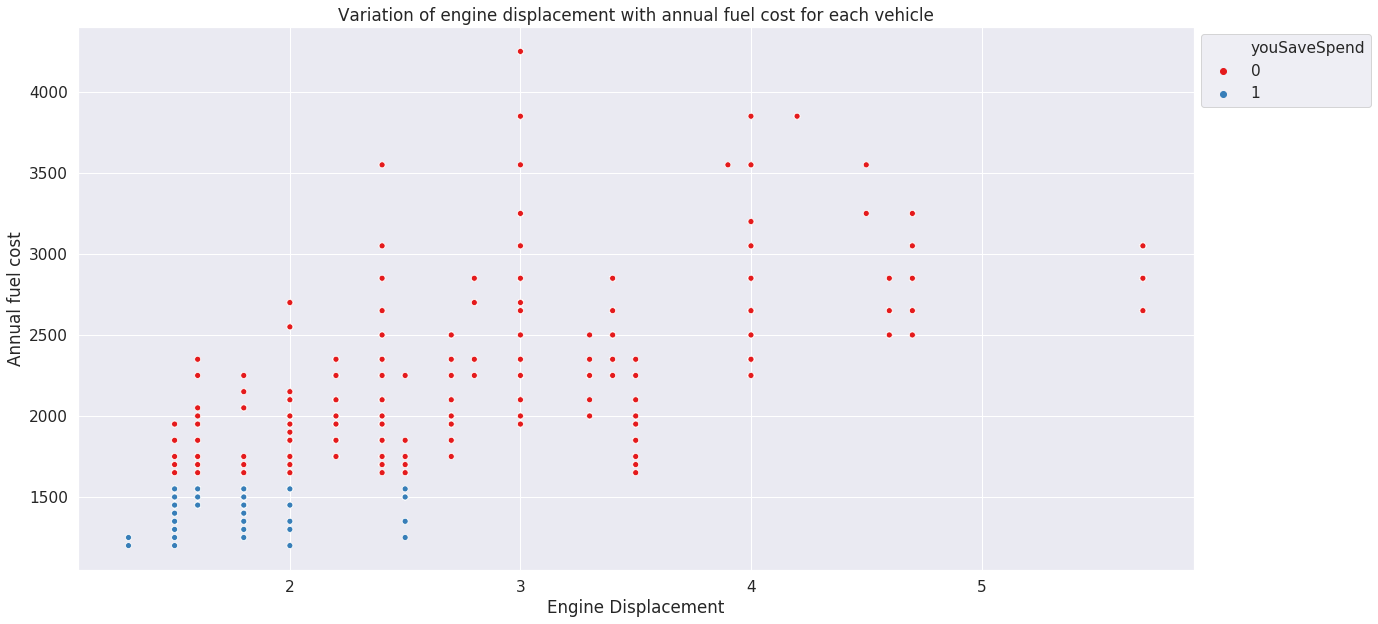

In [245]:
#plot displ against fuelCost08 for all vehicles to determine how well you will spend or save
# Lets check how car's engine displacement(engine size) and annual fuel cost can affect how well you will
# save or spend on a car.

plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="displ", y="fuelCost08",
                     hue="youSaveSpend",
                     palette="Set1",
                     data=toyota_df)
#set axis title 
plt.title('Variation of engine displacement with annual fuel cost for each vehicle')

# Set x-axis label
plt.xlabel('Engine Displacement')

# Set y-axis label
plt.ylabel('Annual fuel cost')
#set legen outside the axis
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#increase font color
sns.set(font_scale=1.4)

**Note** From the two preceding figures, we first see how other features can determine if we could save or spend on a vehicle. Later, we see a relationship between annual fuel cost and engine size, we see that it is a positive relationship where the larger the engine size, the higher the anual fuel cost and the more you will spend on the vehicle. However, the smaller the engine size, the lower the annual fuel cost and the more you will save.

#### 5.1.2 Preprocessing Data for performing Machine learning algorithms
The dataset still contain features which won't be needed in our prediction. Looking at the feature's description [here](https://www.fueleconomy.gov/feg/ws/index.shtml), some irrelevant features are:

- year, charge120, charge240, cityCD, cityE, cityUF, combE, combinedCD,cylinders, highwayCD, highwayE, 
highwayUF, range, rangeCity, rangeHwy,charge240b, phevCity, hpv, lv2, lv4, pv2

In [246]:
toyota_df.columns

Index(['barrels08', 'charge120', 'charge240', 'city08', 'city08U', 'cityCD',
       'cityE', 'cityUF', 'co2', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'drive',
       'fuelCost08', 'fuelType1', 'ghgScore', 'highway08', 'highway08U',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'lv2', 'lv4',
       'make', 'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range',
       'rangeCity', 'rangeHwy', 'trany', 'UCity', 'UHighway', 'VClass', 'year',
       'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy', 'phevComb'],
      dtype='object')

In [261]:
# Select only features which are relevant for the prediction
vehicle_model = toyota_df.copy()
vehicle_model =vehicle_model.drop(['year','charge120', 'charge240', 'cityCD',
                                                 'cityE', 'cityUF', 'combE', 'combinedCD',
                                                 'highwayCD', 'highwayE', 'highwayUF', 'range',
                                                 'rangeCity', 'rangeHwy','charge240b', 'phevCity', 
                                                 'hpv', 'lv2', 'lv4', 'pv2','make'],axis=1)

In [262]:
vehicle_model.shape

(1879, 28)

In [263]:
vehicle_model.columns

Index(['barrels08', 'city08', 'city08U', 'co2', 'co2TailpipeGpm', 'comb08',
       'comb08U', 'combinedUF', 'cylinders', 'displ', 'drive', 'fuelCost08',
       'fuelType1', 'ghgScore', 'highway08', 'highway08U', 'hlv', 'model',
       'mpgData', 'phevBlended', 'pv4', 'trany', 'UCity', 'UHighway', 'VClass',
       'youSaveSpend', 'phevHwy', 'phevComb'],
      dtype='object')

#### 5.1.2.1 Dummy coding
Dummy coding allows us to turn categories into something a regression can treat as having a high (1) and low (0) score. Any binary variable can be thought of as having directionality, because if it is higher, it is category 1, but if it is lower, it is category 0. This allows the regression look at directionality by comparing two sides, rather than expecting each unit to correspond with some kind of increase

In [264]:
# Now seperate the dataset as response variable and feature variabes
target='youSaveSpend'

X = vehicle_model.drop(target, axis = 1)
y = vehicle_model[target]

In [265]:
# converting categorical variables to dummy variables encoded with 0,1....
X = pd.get_dummies(X)

**Precussion:**
Considering the size of my data, it will be risky to use **SVC** as it may take much time to run with grid search.
If it takes long, I will ignore grid search on this model

In [266]:
# Check if seperation was successful
print(y.shape)
print(X.shape)

(1879,)
(1879, 166)


In [270]:
# Here we would also split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20, random_state=42)

In [271]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [272]:
X_train.shape

(1503, 166)

#### 5.1.3 Logistic Regression Model

In [273]:
#Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [274]:
# Print accuracy
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression on test set: 0.99


In [275]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       326
          1       0.96      0.98      0.97        50

avg / total       0.99      0.99      0.99       376



Logistic Regression has an accuracy of 99%

#### 5.1.4 Support Vector Classifier 

In [276]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [277]:
# Print accuracy
print('Accuracy of Support Vector Classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of Support Vector Classifier on test set: 0.97


In [278]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       326
          1       0.90      0.90      0.90        50

avg / total       0.97      0.97      0.97       376



SVC has an accuracy of 97%

#### 5.1.5 Stochastic Gradient Decent Classifier

In [279]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [280]:
# Print accuracy
print('Accuracy of Stochastic Gradient Decent Classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))

Accuracy of Stochastic Gradient Decent Classifier on test set: 0.97


In [281]:
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       326
          1       0.88      0.92      0.90        50

avg / total       0.97      0.97      0.97       376



SGDC has an accuracy of 97%

#### Discussion
From the above models, we see that the model with the highest accuracy of **99%** is **Logistic Regression Model** 

### 5.2 Let's try to increase our accuracy of models

#### 5.2.2 Cross Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. We used 10-fold Cross-Validation to train our models.

In [282]:
#setting kfold value 
kfold = model_selection.KFold(n_splits=10, random_state=7)

#### 5.2.2.1 For Logistic Regression Model

In [283]:
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.992


Logistic Regression Model accuracy didn't change after using cross validation score

#### 5.2.2.2 For Support Vector Classifier

In [284]:
#Now lets try to do some evaluation for random forest model using cross validation.
svc_eval = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=kfold, scoring=scoring)
print('10-fold cross validation average accuracy: %.3f'%(svc_eval.mean()))

10-fold cross validation average accuracy: 0.965


Support Vector Classifier accuracy  didn't change after using cross validation score

#### 5.2.2.3 For Stochastic Gradient Decent Classifier


In [285]:
sgd_eval = cross_val_score(estimator = sgd, X = X_train, y = y_train, cv=kfold, scoring=scoring)
print('10-fold cross validation average accuracy: %.3f'%(sgd_eval.mean()))

10-fold cross validation average accuracy: 0.987


Stochastic Gradient Decent Classifier accuracy increased from 97% to 99% after using cross validation score

#### 5.2.1 Grid Search CV

#### 5.2.1.1 For Support Vector Classifier 

In [286]:
#Finding best parameters for our SVC model
param = {'C':[0.1,0.01,0.0001],'kernel':['linear','rbf']}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
#Best parameters for our svc model
print(grid_svc.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [287]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = grid_svc.best_params_['C'], kernel= grid_svc.best_params_['kernel'])
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Accuracy of Support Vector Classifier on test set: {:.2f}'.format(svc2.score(X_test, y_test)))

Accuracy of Support Vector Classifier on test set: 0.99


In [288]:
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       326
          1       0.98      0.98      0.98        50

avg / total       0.99      0.99      0.99       376



SVC increased from 97% to 99% after Grid Search CV

#### 5.2.1.2 For Logistic Regression Model

In [289]:
#Finding best parameters for our LogisticRegression model

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Create hyperparameter options
# Create regularization penalty space
penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 2.78255940221


In [291]:
#Let's run our LogisticRegression model again with the best parameters
selected_penalty=best_model.best_estimator_.get_params()['penalty']
selected_c=best_model.best_estimator_.get_params()['C']
# Generate the resulting accuracy
logreg2 = LogisticRegression(penalty=selected_penalty,C=selected_c)
logreg2.fit(X_train, y_train)
y_pred2 = logreg2.predict(X_test)

In [292]:
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg2.score(X_test, y_test)))

Accuracy of logistic regression on test set: 1.00


In [293]:
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       326
          1       0.98      1.00      0.99        50

avg / total       1.00      1.00      1.00       376



Logistic regression accuracy changed from 99% to 100% grid search. This is a sign of overfitting

#### 5.2.1.3 For Stochastic Gradient Decent Classifier

In [294]:
# use a full grid over all parameters
param_grid = {"n_iter": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}
 
# run grid search
grid_search = GridSearchCV(sgd, param_grid=param_grid)

grid_search.fit(X_train, y_train)
#Best parameters for our svc model
print(grid_search.best_params_)

{'alpha': 0.001, 'n_iter': 10, 'penalty': 'l2'}


In [295]:
# Let's run our Stochastic Gradient Decent Classifier again with the best parameters
sgds = SGDClassifier(penalty='l2',alpha=0.001,n_iter=10)
sgds.fit(X_train, y_train)
pred_sgds = sgds.predict(X_test)

In [296]:
print('Accuracy of Stochastic Gradient Decent Classifier on test set: {:.2f}'.format(sgds.score(X_test, y_test)))

Accuracy of Stochastic Gradient Decent Classifier on test set: 0.99


Stochastic Gradient Decent Classifier accuracy increased from 97% to 99% after using grid search

### Step 6: Evaluation
It is very important to know if a car will cause you to spend more or be able to save. If your standard of living is low and you wish to buy a car and by all means be able to do some savings, I recommend you analyse all features of the cars in the market. For single fuel gasoline Toyota cars, we recommend you take special note on these features:
```
barrels08, city08, city08U, co2, co2TailpipeGpm, comb08,
 comb08U, combinedUF, cylinders, displ, drive, fuelCost08,
 fuelType1, ghgScore, highway08, highway08U, hlv, model,
 mpgData, phevBlended, pv4, trany, UCity, UHighway, VClass,
 phevHwy, phevComb
 ```
From the graph above in section **5.1.2** which shows the relationship between target feature and other features, we can see how many features of the car can determine your level of spendings and savings. Some Features like:
- **barrels08** which is the annual petroleum consumption in barrels. We see that it has a negative relationship in which the more the annual consumption, the more you will spend and save less.
- **comb08** which is the MPG(Mile Per Gallon). We see a positive relationship in which the higher the MPG value, the more you will save and spend less.

Three models where implemented, to select the best model, we applied GridSearch and cross validation technique. We can see that the best model is Stochastic Gradient Decent Classifier with an accuracy of 99%. Hence this model is accepted as our chosen model.

**NB** We see that Logistic Regression has 100%. This maybe because of overfitting. Also, Support Vector Classifier has 99%, however, this model is computationally very expensive(Takes more time to run the GridSearchCV, especially for large datasets).

### Step 7: Deployment
#### Step 7.1: Project Review
This project was exceptional to me, and I learn a lot about automobile fuel efficiency and how gasoline cars underwent changes over the years. This project also helps me to be able to make a better decision on the kind of car I will like to buy in the future.

This project focused only on single fuel Gasoline cars. However, I think in other to better understand the changes and differences with respect to other car types, it would be better to do a visual comparison among the different car types. This way we can know if the changes were fast or slow or normal and we will be able to make better choices on the various car types.